In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud
# !pip install ipynb 
# !pip install seaborn

In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
import pandas as pd
from ipynb.fs.full.preprocessor_class import Preprocessor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tiast\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tiast\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [3]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_data_train = pd.DataFrame(columns=['text'])
preprocessed_data_test = pd.DataFrame(columns=['text'])

preprocessed_data_train['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

preprocessed_data_test['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [6]:
preprocessed_data_test['text'] = preprocessed_data_test['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_test

,text
0,poorly made shrink fit well
1,playing santa year authentic high quality sant...
2,bought two one better shipping schedule second...
3,came box scratch one lense know inexpensive un...
4,okay kind hard explain really liked skirt know...
...,...
5995,christmas gift boyfriend nice wallet appears l...
5996,better expected pleasantly surprised
5997,skirt awsome arrived real quick lb skirt fit l...
5998,excellent piece elegant sturdy design love fac...


In [7]:
preprocessed_data_train['text'] = preprocessed_data_train['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_train

,text
0,love super comfortable
1,shave cremes need lather feeling fullness rich...
2,love bright color dress fabric nice feel reall...
3,see small got curve get fit like size
4,sister love wolf go wrong cute comfy wolfie
...,...
44995,sandal poorly constructed base shoe fitting ex...
44996,wow shirt comfortable fit hug body softness fr...
44997,problem heel pain pf looking good walking shoe...
44998,keep spotting hand everything blue ink even le...


In [13]:

vocab = 0
# best_vocab = 0
ij = 0
# best_ij = 0
# best_kernel = 0
# best_gamma = 0
# best_c = 0
max_accuracy = 0
best_model = 0
best_tfidf = 0

for vocab in [100,500,1000]:
    for ij in range(1,4):
        for kernel in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:
            for gamma in ['scale', 'auto']:
                for c in [1, 100, 1000]:
                    tfidf_vectorizer = TfidfVectorizer(max_features=vocab, ngram_range=(1,ij))
                    train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data_train['text']) 
                    test_tfidf = tfidf_vectorizer.transform(preprocessed_data_test['text']) 
                    
                    model = SVC(C=c, kernel=kernel, gamma=gamma)
                    
                    print("\n", tfidf_vectorizer)
                    print(model)
                    
                    model.fit(train_tfidf, train_labels['label'])
                    predictii = model.predict(test_tfidf)
                    accuracy = metrics.accuracy_score(test_labels['label'], predictii)
                    
                    if accuracy > max_accuracy:
                        best_model = model
                        best_tfidf = tfidf_vectorizer
                        # best_vocab = vocab
                        # best_ij = ij
                        # best_kernel = kernel
                        # best_gamma = gamma
                        # best_c = c
                        max_accuracy = accuracy
                        
                    print(classification_report(test_labels['label'], predictii))
                    print("accuracy:", accuracy)

print("\nBEST SCORE")
print(best_tfidf)
print(best_model)
# print(classification_report(test_labels['label'], predictii))
print("accuracy:", max_accuracy)


 TfidfVectorizer(max_features=100)
SVC(C=1, kernel='linear')
              precision    recall  f1-score   support

    negative       0.57      0.81      0.67      2250
     neutral       0.49      0.21      0.29      1500
    positive       0.69      0.67      0.68      2250

    accuracy                           0.61      6000
   macro avg       0.59      0.56      0.55      6000
weighted avg       0.60      0.61      0.58      6000

accuracy: 0.6065

 TfidfVectorizer(max_features=100)
SVC(C=100, kernel='linear')
              precision    recall  f1-score   support

    negative       0.57      0.81      0.67      2250
     neutral       0.49      0.21      0.29      1500
    positive       0.69      0.67      0.68      2250

    accuracy                           0.61      6000
   macro avg       0.59      0.56      0.55      6000
weighted avg       0.60      0.61      0.58      6000

accuracy: 0.6071666666666666

 TfidfVectorizer(max_features=100)
SVC(C=1000, kernel='linear')
 

C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

    negative       0.40      1.00      0.57      2250
     neutral       0.00      0.00      0.00      1500
    positive       0.91      0.14      0.24      2250

    accuracy                           0.43      6000
   macro avg       0.44      0.38      0.27      6000
weighted avg       0.49      0.43      0.30      6000

accuracy: 0.4255

 TfidfVectorizer(max_features=100)
SVC(C=100, gamma='auto', kernel='poly')


C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

    negative       0.40      1.00      0.57      2250
     neutral       0.00      0.00      0.00      1500
    positive       0.91      0.14      0.24      2250

    accuracy                           0.43      6000
   macro avg       0.44      0.38      0.27      6000
weighted avg       0.49      0.43      0.30      6000

accuracy: 0.4255

 TfidfVectorizer(max_features=100)
SVC(C=1000, gamma='auto', kernel='poly')


C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tiast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

    negative       0.40      1.00      0.57      2250
     neutral       0.00      0.00      0.00      1500
    positive       0.91      0.14      0.24      2250

    accuracy                           0.43      6000
   macro avg       0.44      0.38      0.27      6000
weighted avg       0.49      0.43      0.30      6000

accuracy: 0.4255

 TfidfVectorizer(max_features=100)
SVC(C=1)
              precision    recall  f1-score   support

    negative       0.59      0.78      0.67      2250
     neutral       0.49      0.24      0.32      1500
    positive       0.70      0.70      0.70      2250

    accuracy                           0.62      6000
   macro avg       0.59      0.58      0.57      6000
weighted avg       0.60      0.62      0.60      6000

accuracy: 0.618

 TfidfVectorizer(max_features=100)
SVC(C=100)
              precision    recall  f1-score   support

    negative       0.58      0.66      0.62      2250
    

TypeError: Sparse precomputed kernels are not supported.

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 262.6 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.6 kB 581.0 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\tiast\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


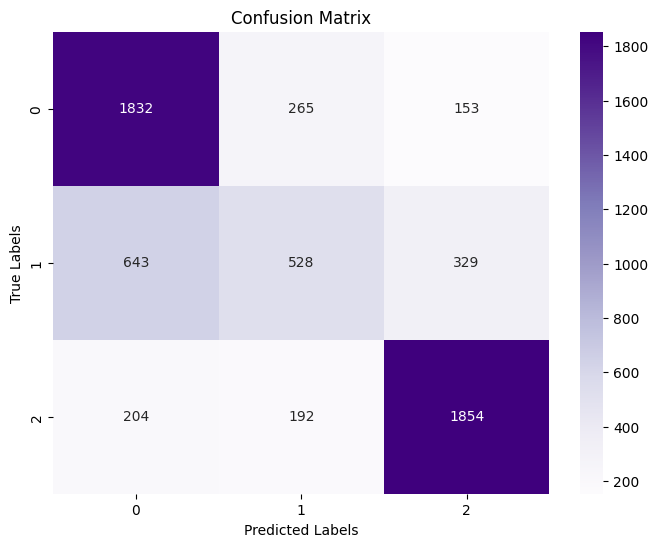

In [12]:


conf_matrix = confusion_matrix(test_labels['label'], predictii)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()